In [2]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_functions import Analysis
import pandas as pd

In [3]:
uqc_cartpole_path = "../../results/overparametrization/4_qubits_5layer"
uqc_cartpole = Analysis(uqc_cartpole_path)

uqc_acrobot = "../../results/acrobot_best/acrobot_best1_with_acrobot_encodingv2"
uqc_acrobot = Analysis(uqc_acrobot)

In [4]:
uqc_cartpole_return = uqc_cartpole.get_rewards()
uqc_acrobot_return = uqc_acrobot.get_rewards()

uqc_cartpole_mean = np.mean(uqc_cartpole_return, axis=0)
uqc_cartpole_std = np.std(uqc_cartpole_return, axis=0)

uqc_acrobot_mean = np.mean(uqc_acrobot_return, axis=0)
uqc_acrobot_std = np.std(uqc_acrobot_return, axis=0)

In [7]:
uqc_cartpole_mean_gradient, _ = uqc_cartpole.calculate_mean_variance_gradients()
uqc_acrobot_mean_gradient, _ = uqc_acrobot.calculate_mean_variance_gradients()

uqc_cartpole_mean_gradient_smoothed = pd.Series(uqc_cartpole_mean_gradient).rolling(250).mean()
uqc_acrobot_mean_gradient_smoothed = pd.Series(uqc_acrobot_mean_gradient).rolling(250).mean()

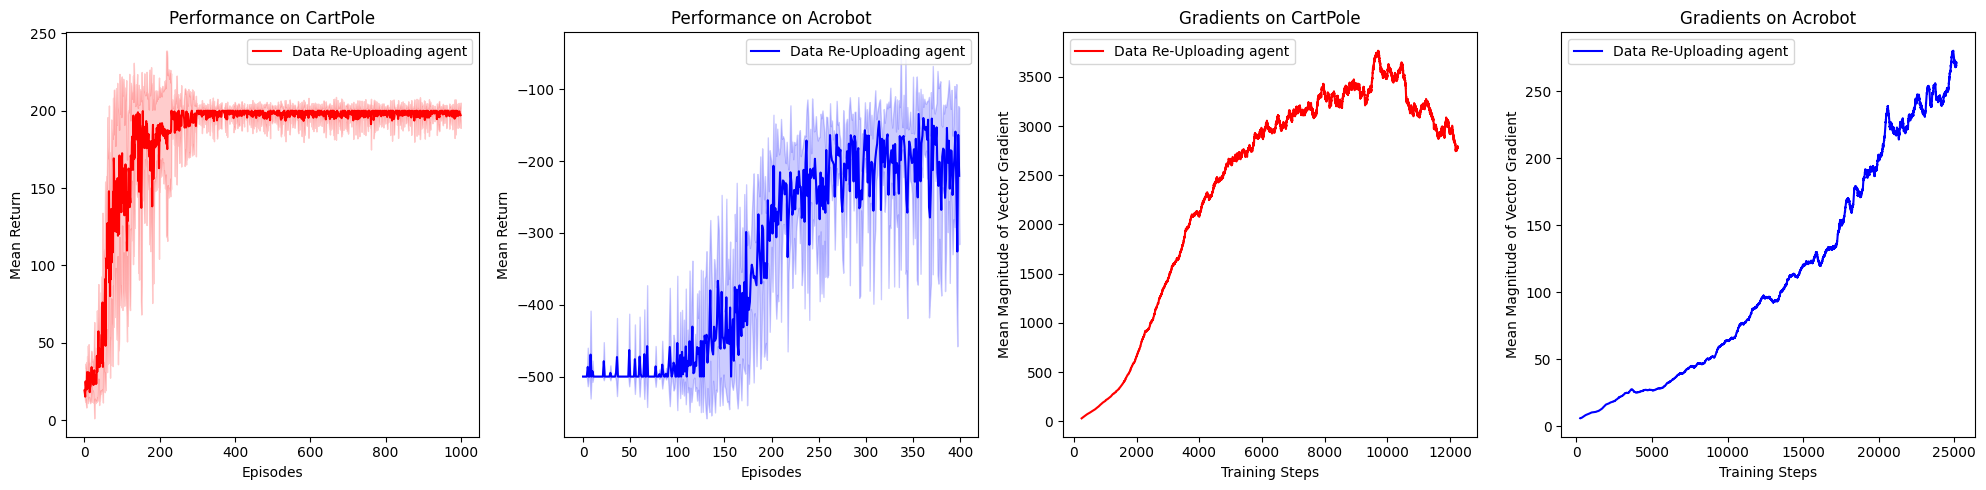

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), tight_layout=True)
axs[0].plot(uqc_cartpole_mean, color = 'red', label = 'Data Re-Uploading agent')
axs[0].fill_between(np.arange(len(uqc_cartpole_mean)), uqc_cartpole_mean - uqc_cartpole_std, uqc_cartpole_mean + uqc_cartpole_std, alpha=0.2, color='red')
axs[0].set_title('Performance on CartPole')
axs[0].set_xlabel('Episodes')
axs[0].set_ylabel('Mean Return')
axs[0].legend()

axs[1].plot(uqc_acrobot_mean, color = 'blue', label = 'Data Re-Uploading agent')
axs[1].fill_between(np.arange(len(uqc_acrobot_mean)), uqc_acrobot_mean - uqc_acrobot_std, uqc_acrobot_mean + uqc_acrobot_std, alpha=0.2, color='blue')
axs[1].set_title('Performance on Acrobot')
axs[1].set_xlabel('Episodes')
axs[1].set_ylabel('Mean Return')
axs[1].legend()

axs[2].plot(uqc_cartpole_mean_gradient_smoothed, color = 'red', label = 'Data Re-Uploading agent')
axs[2].set_title('Gradients on CartPole')
axs[2].set_xlabel('Training Steps')
axs[2].set_ylabel('Mean Magnitude of Vector Gradient')
axs[2].legend()

axs[3].plot(uqc_acrobot_mean_gradient_smoothed, color = 'blue', label = 'Data Re-Uploading agent')
axs[3].set_title('Gradients on Acrobot')
axs[3].set_xlabel('Training Steps')
axs[3].set_ylabel('Mean Magnitude of Vector Gradient')
axs[3].legend()

plt.show()
